# Importation Data Derby

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Derby2.csv", delimiter=";",encoding='ISO-8859-1')
print("les info génerale de la data : ")
df.info()

# Compter le nombre de valeurs manquantes par colonne

missing_counts = df.isnull().sum()

print("Nombre de valeurs manquantes:")
print(missing_counts)

les info génerale de la data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   type                      1000 non-null   object 
 2   status                    1000 non-null   object 
 3   resolution                1000 non-null   object 
 4   component                 989 non-null    object 
 5   priority                  1000 non-null   object 
 6   reporter                  1000 non-null   object 
 7   created                   1000 non-null   object 
 8   assigned                  971 non-null    object 
 9   assignee                  1000 non-null   object 
 10  resolved                  1000 non-null   object 
 11  fixingTimeFromCreate      1000 non-null   float64
 12  fixingTimeFromAssignment  971 non-null    float64
 13  summary                   1000 n

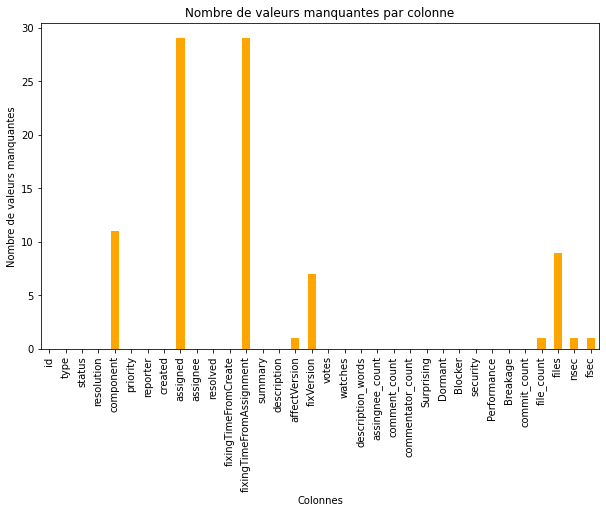

In [15]:
missing_counts = df.isnull().sum()

# Créer un histogramme pour les valeurs manquantes
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='orange')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.show()

# les noms des colonnes qui ont des valeurs manquantes par ligne

In [16]:
# Obtenir les noms des colonnes qui ont des valeurs manquantes par ligne
missing_column_names = df[df.isnull().any(axis=1)].apply(lambda row: row[row.isnull()].index.tolist(), axis=1)

print("Colonnes avec des valeurs manquantes pour chaque ligne:")
print(missing_column_names)

Colonnes avec des valeurs manquantes pour chaque ligne:
0                                               [files]
8                                               [files]
11                 [assigned, fixingTimeFromAssignment]
12                                              [files]
13                 [assigned, fixingTimeFromAssignment]
21                 [assigned, fixingTimeFromAssignment]
23                 [assigned, fixingTimeFromAssignment]
24                 [assigned, fixingTimeFromAssignment]
42                 [assigned, fixingTimeFromAssignment]
44                                         [nsec, fsec]
78                 [assigned, fixingTimeFromAssignment]
85                                          [component]
86                                              [files]
102                [assigned, fixingTimeFromAssignment]
120                                         [component]
149                                             [files]
150                [assigned, fixingTimeFromAssi

# Savoir si l'Id est doublons

In [17]:
id_counts = df['id'].value_counts()

duplicate_ids = id_counts[id_counts > 1]

print("Valeurs d'id dupliquées avec le nombre d'occurrences:")
print(duplicate_ids)

Valeurs d'id dupliquées avec le nombre d'occurrences:
Series([], Name: id, dtype: int64)


In [18]:
#unique_values = df['type'].unique()
#print("Valeurs uniques dans type:")
#print(unique_values)

#unique_values = df['status'].unique()
#print("Valeurs uniques dans status:")
#print(unique_values)

#unique_values = df['priority'].unique()
#print("Valeurs uniques dans priority':")
#print(unique_values)

#unique_values = df['resolution'].unique()
#print("Valeurs uniques dans resolution':")
#print(unique_values)

#unique_values = df['component'].unique()
#print("Valeurs uniques dans component':")
#print(unique_values)


# Traitement des colonnes de Files

In [19]:
df['files'].fillna('pas de fichier', inplace=True)

# Mettre à jour 'file_count' en comptant les ';' 
df['file_count'] = df['files'].str.count(';')

# Ajuster 'file_count' pour les cas de 'pas de fichier'
df.loc[df['files'] == 'pas de fichier', 'file_count'] = 0

df['nsec'].fillna(0, inplace=True)
df['fsec'].fillna(0, inplace=True)

print("DataFrame après avoir remplacé les valeurs manquantes par 0")

print("DataFrame après mise à jour:")


DataFrame après avoir remplacé les valeurs manquantes par 0
DataFrame après mise à jour:


In [20]:
missing_counts = df.isnull().sum()

print("Nombre de valeurs manquantes:")
print(missing_counts)

Nombre de valeurs manquantes:
id                           0
type                         0
status                       0
resolution                   0
component                   11
priority                     0
reporter                     0
created                      0
assigned                    29
assignee                     0
resolved                     0
fixingTimeFromCreate         0
fixingTimeFromAssignment    29
summary                      0
description                  0
affectVersion                1
fixVersion                   7
votes                        0
watches                      0
description_words            0
assingnee_count              0
comment_count                0
commentator_count            0
Surprising                   0
Dormant                      0
Blocker                      0
security                     0
Performance                  0
Breakage                     0
commit_count                 0
file_count                   0
files    

# Traitement de fixingTimeFromCreate

In [21]:
df['created'] = pd.to_datetime(df['created'])

# Remplir 'assigned' si manquant
# Assurez-vous que 'fixingTimeFromCreate' est en jours (float)
df['assigned'] = df.apply(
    lambda row: row['created'] + pd.to_timedelta(row['fixingTimeFromCreate'], unit='d')
    if pd.isnull(row['assigned']) else pd.to_datetime(row['assigned']),
    axis=1
)

print("DataFrame après traitement des valeurs manquantes dans 'assigned':")


DataFrame après traitement des valeurs manquantes dans 'assigned':


In [22]:
missing_counts = df.isnull().sum()

print("Nombre de valeurs manquantes:")
print(missing_counts)

Nombre de valeurs manquantes:
id                           0
type                         0
status                       0
resolution                   0
component                   11
priority                     0
reporter                     0
created                      0
assigned                     0
assignee                     0
resolved                     0
fixingTimeFromCreate         0
fixingTimeFromAssignment    29
summary                      0
description                  0
affectVersion                1
fixVersion                   7
votes                        0
watches                      0
description_words            0
assingnee_count              0
comment_count                0
commentator_count            0
Surprising                   0
Dormant                      0
Blocker                      0
security                     0
Performance                  0
Breakage                     0
commit_count                 0
file_count                   0
files    

# Traitement de la colonne fixingTimeFromAssignment

In [23]:
# Convertir 'resolved' et 'assigned' en datetime
df['resolved'] = pd.to_datetime(df['resolved'])
df['assigned'] = pd.to_datetime(df['assigned'])
df['fixingTimeFromAssignment'] = (df['resolved'] - df['assigned']).dt.total_seconds() / 86400

df['reporter'].fillna('Inconnu', inplace=True)

print("DataFrame après calcul de 'fixingTimeFromAssignment':")

DataFrame après calcul de 'fixingTimeFromAssignment':


In [24]:
missing_counts = df.isnull().sum()

print("Nombre de valeurs manquantes:")
print(missing_counts)

Nombre de valeurs manquantes:
id                           0
type                         0
status                       0
resolution                   0
component                   11
priority                     0
reporter                     0
created                      0
assigned                     0
assignee                     0
resolved                     0
fixingTimeFromCreate         0
fixingTimeFromAssignment     0
summary                      0
description                  0
affectVersion                1
fixVersion                   7
votes                        0
watches                      0
description_words            0
assingnee_count              0
comment_count                0
commentator_count            0
Surprising                   0
Dormant                      0
Blocker                      0
security                     0
Performance                  0
Breakage                     0
commit_count                 0
file_count                   0
files    

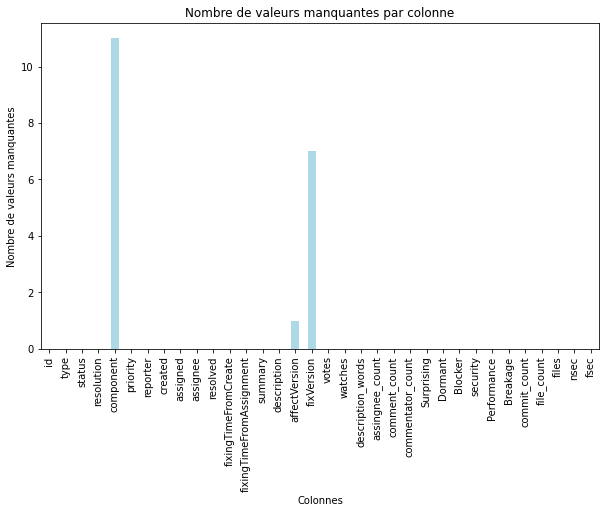

In [25]:
missing_counts = df.isnull().sum()

# Créer un histogramme pour les valeurs manquantes
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='lightblue')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.show()

# Remplir les component

Text(0, 0.5, 'Nombre de valeurs manquantes')

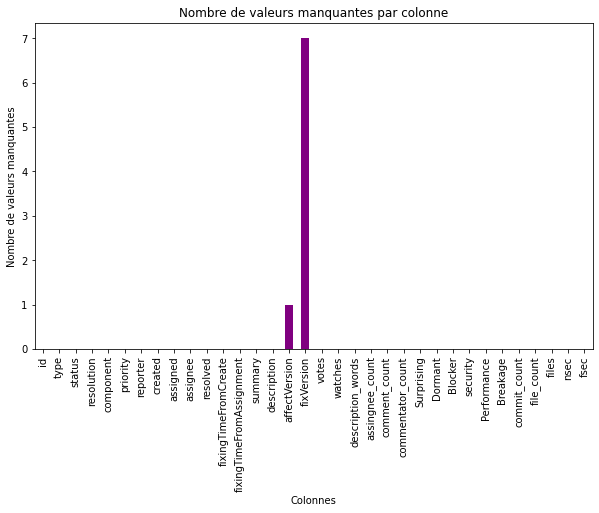

In [26]:
df['component'].fillna('non définie', inplace=True)
missing_counts = df.isnull().sum()
# Créer un histogramme pour les valeurs manquantes
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='purple')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')